# PRÁCTICA 2 - INTELIGENCIA ARTIFICAL
## Curso 2022-2023

- **Mario Ventura Burgos** - 43223476J
- **Luis Miguel Vargas Durán** - 43214929E 

Estudio sobre la probabilidad de supervivencia de pasajeros en el Titanic

![titanic](titanic.jpeg)

## INTRODUCCIÓN
Hace 111 años, en el año 1912, tuvo lugar el famosísimo hundimiento del Titanic, un barco de 269 metros de longitud. En este incidente murieron 1502 personas, de las 2224 que se tienen registradas. Entre ellas, pasajeros, cocineros, tripulantes, etc...

Resulta interesante analizar el incidente desde todos los puntos de vista. Resulta que parece ser que hay ciertas personas con más probabilidad de sobrevivir al mismo incidente que otras.

Desde la asignatura de inteligencia artifical, se nos plantea una práctica cuyo objetivo es usar un dataset de nombre ``dades.csv``, que contiene información acerca de los pasajeros del Titanic, para realizar un estudio estadístico acerca de que características de los pasajeros influyen (y si es así, cuánto influyen) en la probabilidad de sobrevivir al naufragio.<br><br>
Esto se hará usando varios modelos predictivos que nos permitan determinar qué pasajeros son los que más probabilidades tienen de sobrevivir al naufragio.

Dividiremos la práctica en dos partes diferenciadas: <br>

### - PARTE 1: Implementar predictores
La primera parte de la práctica consistirá en entrenar a un conjunto de predictores, analizar y comparar posteriormente, el rendimiento. Tendremos que **entrenar** a los predictores, **analizar y tratar los datos** y **hacer una evaluación de los resultados.** <br>
Disponemos de los siguientes predictores:
- **Perceptrón**    
- **Regresión logística**
- **Árboles de decisión**
- **Random Forest**

### - PARTE 2: Análisis de la importancia de las características
La segunda parte de la práctica consistirá en obtener y analizar cada característica y su importancia en cada uno de los modelos anteriores en el apartado anterior.

## PREPARACIÓN PREVIA
A continuación, antes de comenzar la primera parte de la práctica, leeremos el dataset dades.csv y mostraremos el contenido.<br><br>
Esto se hará con la librería ``pandas``.<br><br>
Además de esta, será necesario importar algunas otras librerías:
## IMPORTS

In [66]:
import numpy as nump
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

<br><br> El dataset que tenemos es el siguiente:

In [67]:
df = pd.read_csv("dades.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


# 1) Implementación de predictores
## 1.1) Tratar y analizar los datos (EDA)
Antes de empezar a tratar y manipular los datos, es necesario entender que el dataset está formado por datos que no están "limpios". Tendremos que **limpiar los datos** de posibles "problemas" o "impurezas", ya que el uso de datos sucios podría interferir negativamente en el entrenamiento. <br><br>
La función ``info`` nos proprocionará una información más detallada de los datos. <br><br>
Posteriormente, con la función ``describe`` mostraremos una **tabla de valores estadísticos** de las columnas numéricas del dataset.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ahora usamos ``describe``

In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### 1.1.1) Eliminación de valores NaN's
En el output obtenido anteriormente al hacer la llamada a ``pand.read_csv()`` podemos ver que en la columna _Cabin_ hay algunos valores **NaN** (Not a Number). Esto se debe a que en el dataset hay valores de este tipo (también pueden verse en columnas como _Age_). <br><br>
Para ver de forma más clara cuáles son las filas con valores _Nan_, existen, entre otras, las siguientes opciones:
- 1.) Usar la función isna() para seleccionar las filas con _Nan_ en **una columna** del dataset: ``df[df['column name'].isna()]``<br><br>
- 2.) Hacer lo mismo que en la opción 1 pero con la función isnull():  ``df[df['column name'].isnull()]``<br><br>
- 3.) Usar la función isna() para seleccionar las filas con _Nan_ en **TODO el dataset**: ``df[df.isna().any(axis=1)]``<br><br>
- 4.) Hacer lo mismo que en la opción 3 pero con la función isnull(): ``df[df.isnull().any(axis=1)]``

En nuestro caso, las opciones 1 y 2 no parecen ser las mejores, dado que no queremos ver los valores _Nan_ en una sola columna, sino en todo el dataset. Por ello, la opción 3 (o la 4) nos serán de mayor utilidad. <br><br>
En nuestro caso, siguiendo con la ocpión 3 y haciendo uso de la función ``isna`` de la librería ``pandas``, se mostrará las filas que tengan algún valor Nan **en todo el dataset**.

In [70]:
df[df.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.05,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.12,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


Dado que no deseamos tener valores _Nan_, será necesario contabilizar y tratar las columnas con este tipo de valores.

Comprobamos qué columnas tienen valores _NaN_ para saber si tendremos que cambiar alguna

In [71]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Podemos ver como el valor **True** ha salido en tres columnas, queriendo indicar que 3 de las 12 variables tienen valores _NaN_
Estas variables serán las que tendremos que limpiar.

Sin embargo, la forma en que se traten estas variables para eliminar sus valores _NaN_ será diferente en función de cuántos valores de este tipo tengan. Para saber cuántos valores _NaN_ hay en cada colmna haremos lo siguiente:

Con el uso de la función ``sum()`` podremos contar el numero de valores _Nan_ en el dataset. Esta función se la concatenaremos a ``df.isna()`` debido a que solo queremos contabilizar los valores _NaN_, y esta función nos devuelve exactamente eso.

In [72]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Esto supone el siguiente procentaje de valores _NaN_ para cada columna:

In [73]:
# Obtener el porcentaje de valores NaN
na_ratio = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending = True)

# Imprimir el porcentaje obtenido
print(na_ratio)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
Age           19.87
Cabin         77.10
dtype: float64


El primer Output obtenido nos enseña la cantidad de valores _NaN_ en cada columna, y el segundo, el procentaje que esto supone en el total de valores que tiene la columna. Gracias a esto, vemos que la columna **Age** tiene un total de 177 valores _NaN_ suponiendo un 19'87% del total de valores, la columna **Cabin** tiene 687 valores _NaN_ suponiendo un total del 77'10% y la columna Embarked tiene únicamente 2 suponiendo un 0'22%.

Estas serán las columnas que tendremos que tratar para **limpiar el dataset**, ya que los valores _NaN_ no nos aportan información y no los queremos.

#### TRATAMIENTO DE LA COLUMNA Embarked
Comencemos por analizar la columna ``Embarked`` tiene solamente 2 valores _NaN_, que son muy pocos ante las 891 filas totales del dataset, suponiendo por tanto un porcentaje pequeño del total. Además, la columna ``Embarked`` tiene solo 3 posibles valores: **S**, **C** y **Q**.

Basándonos en lo anterior, la opción por la que se optará será por **sustituir** estos 2 valores _NaN_ **por el valor más frecuente** encontrado en la columna a lo largo del dataset. <br><br>
Mediante el siguiente código, podemos crear un diagrama de barras que nos permita ver de una forma más sencilla cuál es el valor más repetido:

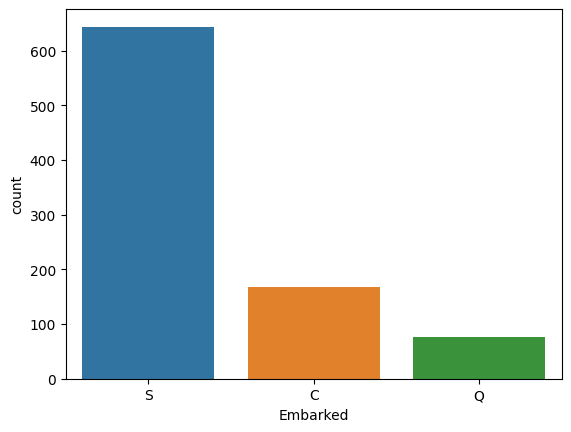

In [74]:
sea.countplot(x="Embarked",data=df)
plt.xlabel=("Embarked")
plt.show()

El valor más repetido en el dataset para la columna ``Embarked`` es **S**, que triplica las apariciones de **C**, el siguiente valor más frecuente. Lo que haremos por tanto, será sustituir estos valores _NaN_ por el valor **S**

Para ello, usaremos la función ``fillna()``, que permite sustituir los valores nulos de una estructura pandas por otro valor.

Existen 3 formas de hacerlo:
- Pueden sustituirse por un valor concreto.
- Puede utilizarse el anterior valor no nulo.
- Puede utilizarse el posterior valor no nulo.

Las opciones 2 y 3 se descartan ya que lo que queremos es sustituir por el valor concreto **S**

In [75]:
df["Embarked"] = df["Embarked"].fillna("S")

In [76]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Podemos ver como ahora ya no aparecen valores _NaN_ en la columna ``Embarked``

#### TRATAMIENTO DE LA COLUMNA Age
Para el caso de la columna ``Age``, existen bastantes más valores _NaN_ que en el caso anterior. Además, el conjunto de posibles valores que puede tomar la columna no es discreto (se puede interpretar como un conjunto discreto de valores, ya que se puede suponer que ningún pasajero va atener una edad superior a 200 años, y se puede asegurar que no habrá edades con valor inferior a 0, pero en cualquier caso el conjunto de posibles valores es mucho mayor). <br><br>
Por ello, para eliminar los valores _NaN_, la solución usada para la columna ``Embarked`` no es la óptima.<br><br>
Por otro lado, inventarnos las edades sería algo ilógico ya que no hay ninguna información que podamos usar para asumir que estos pasajeros eran niños, adolescentes, jóvenes, adultos o ancianos. Estaríamos alterando el dataset y por tanto, los resultados.

En este caso, hemos optado por calcular una media de edades y **sustituir los valores _NaN_** por esta media haciendo uso de la función ``fillna()``.

In [77]:
df["Age"]=df["Age"].fillna(value=df["Age"].mean())
pd.set_option('display.float_format','{:.2f}'.format)

Una vez más, usaremos ``df.isna().sum()`` para comprobar la cantidad de _NaN_ una vez limpiada la columna.

In [78]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

La cantidad de valores _NaN_ en la columna ``Age`` es 0. Nos quedará limpiar la columna ``Cabin``

#### TRATAMIENTO DE LA COLUMNA Cabin (y PassengerId)
Para analizar esta columna es importante tener en cuenta la relación de la columna ``Cabin`` y ``Pclass``. Esta última nos determina la clase del pasajero. Será más probable que aquellos pasajeros de clase menor vayan en cubierta al no tener cabina por ser pasajeros de pocos recursos.

Para poder hacer este análisis seguimos los siguientes pasos:<br> 
- 1. Creamos una copia del DataFrame original llamada ``df_sin_cabina`` en la que solo incluiremos las filas con valores nulos en ``Cabin`` , es decir, aquellos pasajeros que no disponían de cabina. <br><br>
- 2. Utilizamos el método `count()` para contar la cantidad de pasajeros por cada clase en ``Pclass`` <br><br>
- 3. Representamos la información mediante un histograma utilizando el método ``countplot()`` de la librería seaborn y pasando como parámetro el DataFrame ``df_sin_cabina`` nuevo que hemos creado.

In [79]:
#PASO 1. Creación del nuevo dataframe
df_sin_cabina = df[df["Cabin"].isna()]
pclass_count = df_sin_cabina["Pclass"].value_counts()

Ahora tenemos una copia del dataframe ``df`` guardada en otro nuevo dataframe ``df_sin_cabina``, por tanto, podemos pasar a contar la cantidad de pasajeros usando **count()** por cada clase en ``Pclass``.<br><br>
Posteriormente, representaremos el resultado con un histograma (paso 3) utilizando el método ``countplot`` como se ha explicado anteriormente.

Pasajeros sin cabina separados por clase


3    479
2    168
1     40
Name: Pclass, dtype: int64

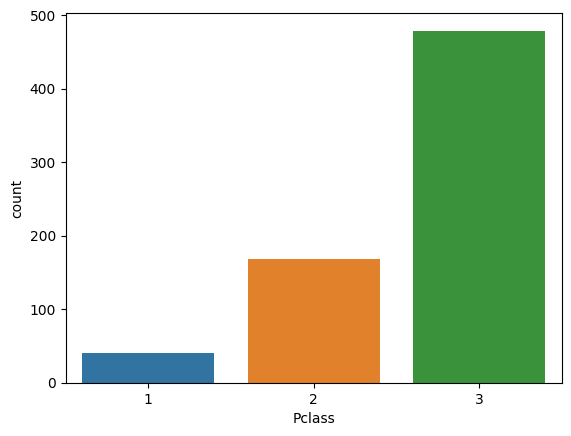

In [80]:
#PASO 2. Usamos count() para contar los pasajeros por cada clase
sea.countplot(x="Pclass",data=df_sin_cabina)
plt.xlabel=("Pclass")
plt.show

#PASO 3.
print("Pasajeros sin cabina separados por clase")
pclass_count

Se puede ver como hay menos de 100 pasajeros de 1ª clase sin cabina, cerca de 200 en 2ª clase y casi 500 en 3ª clase. Esto parece lógico ya que los pasajeros que viajan en primera clase son los que más recursos tienen y, por tanto, son pocos los que viajan sin cabina en comparación a los pasajeros de otras clases.

Dado que hay más pasajeros de 3ª clase viajando sin cabina, es más fácil deducir en qué clase viajaba el pasajero si sabemos que no tenía cabina. <br><br>
Puesto que la columna ``Pclass`` ya nos proporciona la información que necesitamos, **se eliminará la columna ``Cabin``** ya que tiene un número muy elevado de valores _NaN_. Esto se hará con la función ``drop()``, que recibirá por parámetro el nombre de la columna que se debe eliminar, y el valor **_True_** para ``inplace``, que indica que los cambios se harán sobre el dfactual.

In [81]:
# ---> Eliminación de la columna Cabin y PassengerId
df.drop(["Cabin","PassengerId"],axis=1,inplace=True)

### NOTA:
Se ha eliminado tambien la columna _passengerId_ porque la identificación del pasajero no tiene relevancia en la probabilidad de sobrevivir al naufragio o no. Tener esta variable entorpecería el posterior cálculo de las precisiones de los modelos y las operaciones que estos hacen. 

Una vez más, usemos ``df.isna().sum()`` para contar la cantidad de valores _NaN_ en cada columna y comprobar la presencia de estos valores en el dataset.

In [82]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Vemos como ahora ya no existe la columna ``Cabin`` y por tanto, ya no hay valores _NaN_ en el dataset. <br><br>
**Hemos limpiado el dataset** de este tipo de valores.

<br><br>
### 1.1.2) Presencia de datos categóricos
El objetivo de la práctica, tal y como se ha explicado previamente en el apartado de **Introducción**, es hacer un estudio sobre la probabilidad de supervivencia de pasajeros en el Titanic, para lo cuál suena evidente que necesitaremos valores numéricos con los que tratar. Sin embargo, el dataset cuenta con **datos categóricos**, que son datos de tipo no numérico.<br><br>
Tal y como su nombre indica, estos valores ayudan a establecer una categoría en la que 'encasillar' a los pasajeros; por ejemplo sexo, religión, etc...

Las columnas con datos de tipo categórico son:
- Name
- Sex
- Embarked
- Ticket

#### 1.1.2.1)  Name & Ticket
Los datos categóricos son muy útiles para conocer información de cualquier tipo de cualidad o propiedad de los pasajeros. Para el caso de las columnas ``Name`` y ``Ticket``, estas presentan **datos contínuos**. Las continuas nos aportan datos cuantitativos, es decir, pueden adoptar un valor cualquiera dentro de un rango.

**Descartaremos**, por tanto, este tipo de datos ya que son **datos contínuos**, y la representación numérica de estos no es factible. Para ello, haremos uso de la función ``drop()`` tal y como se usó para eliminar la columna ``Cabin`` en el apartado **1.1.1**

In [83]:
# Eliminación de las columnas Name y Ticket
df.drop(["Name","Ticket"], axis=1, inplace=True)

# Mostrar dataset
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00,S
887,1,1,female,19.00,0,0,30.00,S
888,0,3,female,29.70,1,2,23.45,S
889,1,1,male,26.00,0,0,30.00,C


**OBSERVACIÓN:** Se puede ver como ``df`` sigue teniendo 891 filas, pero ahora cuenta solo con 9 columnas (frente a las 12 que había inicialmente). Esto se debe a la eliminación de las columnas ``Cabin`` (apartado **1.1.1**), ``Name`` y ``ticket``

#### 1.1.2.2) Sex & Embarked


Para el caso de las columnas ``Sex`` y ``Embarked``, estas pueden adoptar un **conjunto discreto de valores** (es decir pueden adoptar unos valores específicos, como por ejemplo, Male y Female para el caso de _Sex_), por tanto podemos hacer una representación numérica de estos valores.

Tendremos que buscar una forma de cambiar el formato del dato para conseguir representar de forma numérica este tipo de valores (por ejemplo, 0 = hombre y 1 = mujer).

Para ello, se puede usar un formato **``ONE HOT``**, que es un sistema de codificación que se usa a menudo para indicar el estado de una máquina de estados. La ventaja que este sistema supone frente a otros sistemas de codificación es que no nos hará falta un decodificador.

Podemos extrapolar esto y, mediante la creación de **``DUMMIES``** (variables ficticias usadas para explicar valores cualitativos), codificar nuestra columnas ``Sex`` y ``Embarked``.
Para ellos se usará la función ``get_dummies()`` de la librerí ``pandas``

In [84]:
# Creación de dummies
df = pd.get_dummies(df, drop_first=True)

# Mostrar Dataset
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.00,1,0,7.25,1,0,1
1,1,1,38.00,1,0,71.28,0,0,0
2,1,3,26.00,0,0,7.92,0,0,1
3,1,1,35.00,1,0,53.10,0,0,1
4,0,3,35.00,0,0,8.05,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,0,0,13.00,1,0,1
887,1,1,19.00,0,0,30.00,0,0,1
888,0,3,29.70,1,2,23.45,0,0,1
889,1,1,26.00,0,0,30.00,1,0,0


**OBSERVACIÓN:** Se puede ver como ahora en el dataset hay 10 columnas, es decir, el número de columnas ha aumentado en 1. Esto es porque ahora la columna ``Sex`` se ha convertido en ``Sex_male``, donde 0 representa que el sexo no es Male, y el 1 representa que el sexo del pasajero sí es Male. Por otro lado, como no era posible hacer esto con la columna ``Embarked``, lo que se ha hecho es dividirla por ciudades. Es por esto que se puede ver que ahora la columna se divide en:
- Embarked_Q
- Embarked_S

Tras esto, **el dataset está suficientemente tratado o "limpio"** para comenzar con la implementación de los modelos predictivos

<br><br>
### 1.1.3) Análisis del dataset
Analizemos el dataset mediante la creación de algunos diagramas o representaciones gráficas:

Comenzaremos creando una correlación de todas las variables para analizarlas, usando un mapa de calor con la función ``heatmap()``

Las librerías necesarias son seaborn, pandas y numpy. Una vez realizado el import de estas, se utiliza la función heatmap de seaborn dándole el dataset. La función únicamente necesita este dataset que contiene los valores a representar, aunque se puede indicar otros parámetros para personalizar el resultado.<br><br>
Los parámetros que le pasaremos a la función son:

**CENTER**: El valor en el cual centrar el mapa de color al hacer la representación del dataset.<br>
**CMAP**: Indica el mapa o el color del mapa que se utilizará. En nuestro caso, _RdYlGn_ significa Red, Yellow y Green.<br>
**ANOT**: Indica si se representa o no la magnitud de cada celda.<br>
**FMT**: Es el formato con el que se representará la magnitud. Nosotros usaremos 2 cifras<br>

<AxesSubplot:>

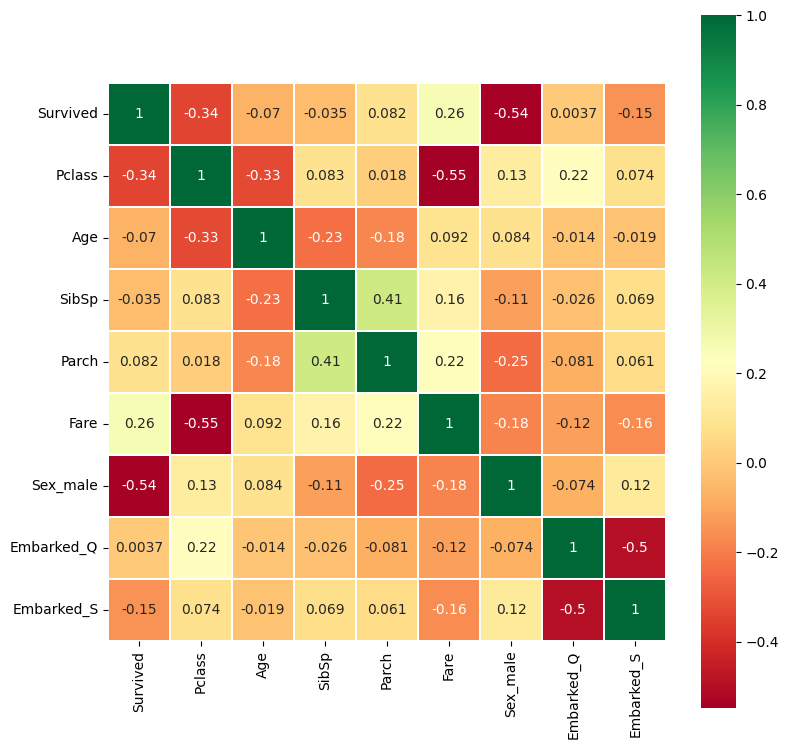

In [85]:
# Copia del dataset
model = df
# Crear mapa de calor para la correlación
corr_fig = plt.figure(figsize=(9,9))
sea.heatmap(model.corr(), annot=True, square=True, cmap="RdYlGn", linewidths=0.2)

<br><br>
## 1.2) Modelos predictivos


Para crear los modelos predictivos, tenemos que separar los datos de ``df`` en **training** y **test sets**. Esto lo haremos con la ayuda de la función **``train_test_split()``**. <br>A esta función, le pasaremos los parámetros **test_size = 0'3** para asignar un 30% de test (y por tanto 70% de training)<br>
También hacemos uso del `scaler`para la normalización de los datos para que puedas ser comparados más fácilmente.

In [86]:
# Inicialización de la clase MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Separación de la columna "Survived" como variable objetivo "y"
y = model["Survived"]

# Eliminación de la columna "Survived" del conjunto de datos "x"
x = model.drop("Survived", axis=1)

# Escalamiento de las variables de "x" con la clase MinMaxScaler
x = scaler.fit_transform(x)

# División de los datos en conjuntos de entrenamiento y prueba
# con un tamaño de prueba del 30% y una semilla aleatoria fija en 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y , random_state=2)

Ahora ya podemos usar estos training/test set para los modelos predictivos

### 1.2.1) PERCEPTRON
Recordemos que el Perceptron es un clasificador binario que, dadas unas entradas, nos devuelve una salida. El perceptron tiene un modelo de aprendizaje y un algoritmo de **entrenamiento de datos**.
Vamos a crear uno y a entrenar los datos haciendo uso de la función ``fit()``.

**ENTRENAMIENTO**

In [87]:
perceptron = Perceptron()
perceptron.fit(x_train,y_train)

Perceptron()

Hecho esto, podemos obtener la predicción del perceptron en base a estos datos entrenados. Para conseguirla, usaremos la función ``predict()``, a la que le proporcionaremos ``x_test`` como parámetro. El resultado se almacenará en ``y_pred_perceptron``.

**PREDICCIÓN Y EVALUACIÓN:**

In [88]:
y_pred_perceptron = perceptron.predict(x_test)

Para medir la precisión de esta predicción, guardaremos en ``accuracy_perceptron`` el valor redondeado de la score que devuelve el perceptrón con estos datos entrenados. Para hacer esto, llamaremos a la función **``score()``** del perceptrón y guardaremos su resultado en una variable (score). Posteriormente, redondearemos este score y lo guardaremos en accuracy_perceptron para luego imprimirlo. <br><br>
Esto lo haremos con la ayuda de la función **``round()``**, que recibe un número en coma flotante y devuelve un número entero redondeado a tantas cifras como se le indique (en nuestro caso bastará con 2 cifras)

In [89]:
# Se obtiene el score del perceptron y se almacena
score = perceptron.score(x_test, y_test)

# Se calcula la precisión con el score (se multiplica x100 para pasarlo a porcentaje)
accuracy_perceptron = round(score*100,2)  # Se redondea a 2 cifras

# Mostrar precisión obtenida
print(accuracy_perceptron,"%")

68.66 %


Mostremos ahora la clasificación obtenida por el perceptron, en una tabla que muestre la _precisión_, el _recall_, _f1-score_ y _support_

In [90]:
print(classification_report(y_test, y_pred_perceptron))

              precision    recall  f1-score   support

           0       0.83      0.61      0.71       165
           1       0.56      0.81      0.66       103

    accuracy                           0.69       268
   macro avg       0.70      0.71      0.69       268
weighted avg       0.73      0.69      0.69       268



**MATRIZ DE CONFUSIÓN**

Veamos ahora una representación más clara de la predicción obtenida en contraposición con el valor actual haciendo uso de una **``matriz de confusión``**. Esta matriz es una herramienta que permite la visualización del desempeño de un algoritmo como el anterior

In [91]:
# Crear matriz de confusión
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_perceptron),['Actual: NO Sobrevive','Actual: Sobrevive'],['Pred: NO Sobrevive','Pred: Sobrevive'])

# Imprimir matriz
print(cm)

                      Pred: NO Sobrevive  Pred: Sobrevive
Actual: NO Sobrevive                 101               64
Actual: Sobrevive                     20               83


### 1.2.2) REGRESIÓN LOGÍSTICA
Para el modelo de regresión logística el proceso es el mismo, tendremos que:
- Entrenar los datos
- Hacer la predicción y evaluación
- Mostrar lo obtenido con una matriz de confusión

**ENTRENAMIENTO**

In [92]:
# Creación del modelo estableciendo un máximo de iteraciones
logistic_regression = LogisticRegression(max_iter = 1000)

# Proporcionar los datos de entrenamiento
logistic_regression.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

**PREDICCIÓN Y EVALUACIÓN**

El proceso es el mismo que el seguido para el perceptron: Se consigue la score, se redondea con la función **``round()``**, se almacena el resultado en ``accuracy_logistic_regression`` y se imprime multiplicándolo x100 para dar el resultado en forma de porcentaje

In [93]:
# Obtener la predicción
y_pred_logistic_regression = logistic_regression.predict(x_test)
# Obtener el score
score = logistic_regression.score(x_test, y_test)
# Redondeo a 2 cifras con el score obtenido
accuracy_logistic_regression = round(score*100,2)
# Mostrar la precisón obtenida a modo de porcentaje
print(accuracy_logistic_regression,"%")

79.48 %


Mostremos ahora la clasificación obtenida en una tabla que muestre la _precisión_, el _recall_, _f1-score_ y _support_

In [94]:
print(classification_report(y_test, y_pred_logistic_regression))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       165
           1       0.73      0.74      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



**MATRIZ DE CONFUSIÓN**

Nuevamente, se hará una matriz de confusión al igual que se hizo con el perceptrón

In [95]:
# Creación de la matriz de confusión
confusion_matrix_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_logistic_regression), ['Actual: NO Sobrevive','Actual: Sobrevive'], ['Pred: NO Sobrevive','Pred: Sobrevive'])

# Imprimir la matriz
print(confusion_matrix_lr)

                      Pred: NO Sobrevive  Pred: Sobrevive
Actual: NO Sobrevive                 137               28
Actual: Sobrevive                     27               76


### 1.2.3) ÁRBOLES DE DECISIÓN
El proceso vuelve a ser el mismo, tendremos que:
- Entrenar los datos
- Hacer la predicción y evaluación
- Mostrar lo obtenido con una matriz de confusión

**ENTRENAMIENTO**

In [96]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

**PREDICCIÓN Y EVALUACIÓN**

In [97]:
# Obtener la predicción
y_pred_dectree = dt.predict(x_test)
# Obtener el score
score = dt.score(x_test, y_test) 
# Obtener accuracy redondeando el score a 2 cifras
acc_dectree = round(score*100,2)
# Imprimir accuracy
print(acc_dectree,"%")

74.63 %


Mostremos la clasificación obtenida en una tabla que muestre la _precisión_, el _recall_, _f1-score_ y _support_

In [98]:
print(classification_report(y_test, y_pred_dectree))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       165
           1       0.66      0.71      0.68       103

    accuracy                           0.75       268
   macro avg       0.73      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



**MATRIZ DE CONFUSIÓN**

Nuevamente, se hará una matriz de confusión al igual que se hizo con los casos anteriores

In [99]:
# Creación de la matriz de confusión
cm_dectree = pd.DataFrame(confusion_matrix(y_test, y_pred_dectree), ['Actual:NO Sobrevive','Actual:Sobrevive'],['Pred:NO Sobrevive','Pred:Sobrevive'])

# Imprimir la matriz
print(cm_dectree)

                     Pred:NO Sobrevive  Pred:Sobrevive
Actual:NO Sobrevive                127              38
Actual:Sobrevive                    30              73


### 1.2.4) RANDOM FOREST

**ENTRENAMIENTO**

In [100]:
# Se crea el random forest
rf = RandomForestClassifier(n_estimators=100)
# Se entrena los datos
rf.fit(x_train,y_train)

RandomForestClassifier()

**PREDICCIÓN Y EVALUACIÓN**

In [101]:
# Obtener la predicción
y_pred_randomforest = rf.predict(x_test)
# Obtenemos el score
score = rf.score(x_test, y_test)
# Usamos el score para sacar la precisión en porcentaje
accuracy_rf = round(score*100,2)   # Se redondea a 2 cifras
# Se muestra la precisión
print(accuracy_rf,"%")

81.72 %


Una vez más, mostramos en una tabla la _precisión_, el _recall_, _f1-score_ y _support_:

In [102]:
print(classification_report(y_test, y_pred_randomforest))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       165
           1       0.77      0.75      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



**MATRIZ DE CONFUSIÓN**

Por última vez, crearemos una matriz de confusión para obtener visualización del desempeño del algoritmo:

In [103]:
# Creación de la matriz de confusión
cm_randomforest = pd.DataFrame(confusion_matrix(y_test, y_pred_randomforest), ['Actual: NO Sobrevive', 'Actual: Sobrevive'], ['Pred: NO Sobrevive', 'Pred: Sobrevive'])
# Se muestra la matriz
print(cm_randomforest)

                      Pred: NO Sobrevive  Pred: Sobrevive
Actual: NO Sobrevive                 142               23
Actual: Sobrevive                     26               77


### 1.2.5) EVALUACIÓN DE LOS MODELOS PREDICTIVOS

Todos los modelos predictivos que se han implementado han hecho un cálculo de precisión (_accuracy_) posterior al entrenamiento de los datos. Dado que los **modelos son diferentes**, los entrenamientos, reglas de aprendizaje o algoritmos también lo son, provocanado que el cálculo de **la precisión sea también diferente** en cada modelo.<br><br>
Para hacer una evaluación de los modelos predictivos, podemos comparar el valor que cada uno ha obtenido para la precisión.

Gracias a la librería ``pandas``, podemos crear una tabla que ordene la precisión obtenida de modelos predictivos y los muestre haciendo un "ranking".

In [104]:
# Se crea la tabla (array bidimensional)
modelos = pd.DataFrame({
    'Modelo Predictivo': ['Perceptron','Regresión Logística','Árboles de decisión','Random Forest'],
    'Precisión': [accuracy_perceptron, accuracy_logistic_regression, acc_dectree, accuracy_rf]
})

Ahora que hemos creado la tabla, mediante una llamada a la función **``sort_values()``** podemos ordenar la tabla siguiendo un criterio, que en nuestro caso será ascendente:

In [105]:
modelos.sort_values(by='Precisión', ascending=True)

,Modelo Predictivo,Precisión
0,Perceptron,68.66
2,Árboles de decisión,74.63
1,Regresión Logística,79.48
3,Random Forest,81.72


Se puede ver como el modelo con un valor mayor para la _precisión_ es el **``Random Forest``**, mientras que el **``Perceptron``** es el que menos precisión ha obtenido

# 2) Análisis de importancia de las Características

Acabada la implementación de los cuatro modelos predictivos y su respectivo análisis, **es importante también hacer un análisis de la importancia de sus características**. El análisis de características de un modelo (o **``FEATURE IMPORTANCE``**) se refiere a las técnicas que se usan para calcular u obtener una puntuación para todas las características de entrada de un modelo dado.
<br>
Estas puntuaciones que obtengamos simplemente representarán la "importancia" de cada una de estas características.

Veamos de qué forma haremos el análisis de cada uno de los modelos:

In [106]:
scaler = preprocessing.MinMaxScaler()

y = model["Survived"]
x = model.drop("Survived", axis=1)

# Escalam les dades en funció de x
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y , random_state=2)

## 2.1) Modelo de Perceptron

Para comparar los atributos más importantes en los modelos Perceptron (y Regresión Logística), utilizaremos el método para examinar los coeficientes que nos brinda la función ``coef_``. Esta función se encarga de almacenar los coeficientes una vez que el modelo ya ha sido previamente entrenado. Para facilitar la representación gráfica, tomaremos el valor absoluto de los valores de importancia. <br> 

In [107]:
#Obtención de los coeficientes del modelo entrenado
coeficiente_p = perceptron.coef_[0]

#Conversión de la matriz de entrenamiento a un DataFrame para poder tratar con él en el resto de modelos
x_train = pd.DataFrame(x_train, columns=model.drop("Survived", axis=1).columns)

#Creación de un nuevo DataFrame usando los nombres de las columnas de los datos 
#de entrenamiento como los nombres de las columnas de "Atributo" e "Importance"
#y se asigna a una variable "importancias_p".
#Los valores de la columna "Importance" se obtienen cogiendo el valor absoluto 
#de los coeficientes del Perceptron
importancias_p = pd.DataFrame(data = {'Atributo':x_train.columns, 
                                      'Importance':abs(coeficiente_p)})

#Ordenamos el DataFrame por la columna "Importance" en orden descendente
importancias_p = importancias_p.sort_values(by = 'Importance',
                                            ascending = False)

#Imprimimos el DataFrame
importancias_p

,Atributo,Importance
1,Age,3.99
3,Parch,3.00
2,SibSp,2.88
0,Pclass,2.50
4,Fare,1.25
5,Sex_male,1.00
6,Embarked_Q,1.00
7,Embarked_S,1.00


Para entender mejor la tabla anterior, vamos a crear un histograma para la **feature importance** del perceptron, donde se muestre de una forma más clara el valor obtenido de la _Importance_ para cada atributo

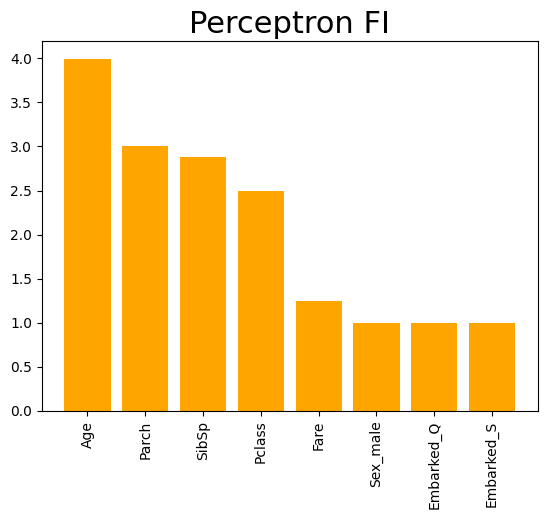

In [108]:
#Procedemos a la representación gráfica del DataFrame anterior usando la funcion `plt.bar()`
plt.bar(importancias_p['Atributo'],importancias_p['Importance'], color='#FFA500')

#Establecemos el titulo de la gráfica con su tamaño
plt.title('Perceptron FI', size = 22)

#Usamos la función "plt.xticks()" para evitar la superposición de letras en el eje x
plt.xticks(rotation = 'vertical')

#Mostramos la gráfica por pantalla
plt.show()

### ANÁLISIS DE LO OBTENIDO:
Como se puede ver, ordenado de forma descendiente, se muestran las importancias de cada característica que tienen una mayor influyencia en la capacidad de sobrevivir de un pasajero al incidente. En este caso, destacan sobre todo las características de la Edad ``Age`` y la clase ``Pclass`` del pasajero.<br><br>
Esto muestra que pasajeros de cierta edad, posiblemente, tendrían más probabilidad de sobrevivir que pasajeros de una edad menor como ancianos. La clase también tiene una relevancia bastante elevada ya que la clase de los pasajeros, determinaba en muchos casos, si estos tenian cabina o no, o muy probablemente, las preferencias de evacuación para las clases con más poder económico primero.<br><br>
Sin embargo, características como la ciudad en la que el pasajero embarcó no tienen tanta relevancia.

## 2.2) Regresión logística

Tal y como hemos comentado antes, en el modelo de regresión logística procederemos de la misma forma que en el Perceptron, haciendo uso de la función **``coef_``**

In [109]:
#Obtención de los coeficientes del modelo entrenado
coeficiente_LR = logistic_regression.coef_[0]

#Creación de un nuevo DataFrame de la misma forma que en el perceptron
importancias_LR = pd.DataFrame(data = {'Atributo':x_train.columns, 
                                      'Importance':abs(coeficiente_LR)})

#Ordenamos el DataFrame por la columna "Importance" en orden descendente
importancias_LR = importancias_LR.sort_values(by = 'Importance',
                                            ascending = False)

#Imprimimos el DataFrame
importancias_LR

,Atributo,Importance
5,Sex_male,2.59
1,Age,2.02
0,Pclass,1.94
2,SibSp,0.88
4,Fare,0.60
3,Parch,0.42
7,Embarked_S,0.29
6,Embarked_Q,0.00


Al igual que para el perceptron, creamos un histograma para la **feature importance**.

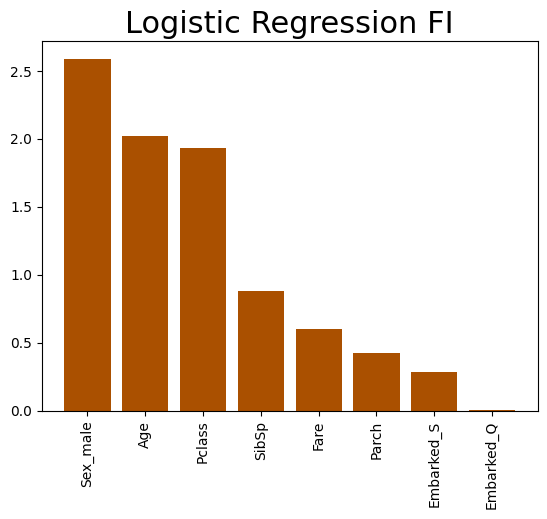

In [110]:
#Procedemos a la representación gráfica del DataFrame anterior usando la funcion `plt.bar()`
plt.bar(x = importancias_LR['Atributo'], height = importancias_LR['Importance'], color='#AA5000')

#Establecemos el titulo de la gráfica con su tamaño
plt.title('Logistic Regression FI', size = 22)

#Usamos la función "plt.xticks()" para evitar la superposición de letras en el eje x
plt.xticks(rotation = 'vertical')

#Mostramos la gráfica por pantalla
plt.show()

### ANÁLISIS DE LO OBTENIDO
En este caso, las variables que influirían positivamente serían _Sex male_, _Age_ y _Pclass_, que destacan notablemente por encima del resto; mientras que nuevamente, las ciudades donde el pasajero embarcó (_Embarked S_ o _Embarked Q_ junto con _PassengerId_ son las variables que influirían negativamente).<br><br>
Esto nos indica que los hombres, y gente de cierta edad serían los que tendrían menos posibilidad de sobrevivir.

## 2.3) Árboles de Decisión

Para los modelos basados en árbol (Árboles de decisión y Random Forest), a diferencia de los dos anteriores, ya no usaremos la función ``coef_``, usaremos ``feature_importances_``. Esto se hace para determinar los atributos más importantes de estos modelos.

El proceso, sin embargo, es el mismo. Tendremos que Almacenar el coeficiente mediante una llamada a ``feature_importances_``, crear un dataframe con las columnas _Atributo_ e _Importance_, ordenar en función de estas importancias obtenidas y mostrar la tabla

In [111]:
#Asignamos a la variable "coeficiente_DT" las importancias de este modelo mediante la función comentada previamente
coeficiente_DT = dt.feature_importances_

#Creamos el DataFrame de la misma forma que hemos procedido en los dos modelos anteriores
importancias_DT = pd.DataFrame(data={'Atributo': x_train.columns,'Importance': abs(coeficiente_DT)})

#Ordenamos el DataFrame por la columna "Importance" en orden descendente
importancias_DT = importancias_DT.sort_values(by='Importance', ascending=False)

#Imprimimos el DataFrame
importancias_DT

,Atributo,Importance
5,Sex_male,0.32
1,Age,0.25
4,Fare,0.23
0,Pclass,0.09
2,SibSp,0.05
3,Parch,0.03
7,Embarked_S,0.02
6,Embarked_Q,0.01


Al igual que en los dos modelos anteriores, también usaremos un histograma para ver de forma más visual la importancia obtenida para cada atributo

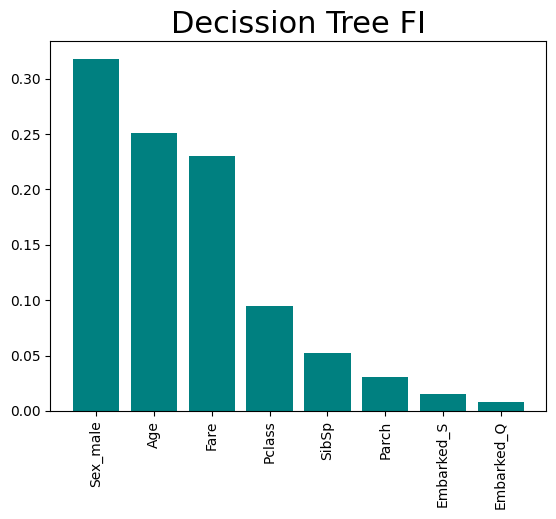

In [112]:
#Procedemos a la representación gráfica del DataFrame anterior usando la funcion "plt.bar()"
plt.bar(x = importancias_DT['Atributo'], height = importancias_DT['Importance'], color='#008080')

#Establecemos el titulo de la gráfica con su tamaño
plt.title('Decission Tree FI', size = 22)

#Usamos la función "plt.xticks()" para evitar la superposición de letras en el eje x
plt.xticks(rotation = 'vertical')

#Mostramos la gráfica por pantalla
plt.show()

### ANÁLISIS DE LO OBTENIDO
En este caso, la variable _Sex male_ es la que influiría positivamente en las psoibilidades de sobrevivir, indicando que los hombre tenían una gran probabilidad de ello. Sin embargo, la ciudad en la que los pasajeros embarcaron no tiene una gran influencia en la superviviencia, al igual que _Parch_.

## 2.4) Random Forest

Para acabar con este último modelo, como está basado en árbol, procederemos de la misma forma que en el modelo anterior para la creación del nuevo DataFrame, haciendo uso de la técnica Feature Importance.

In [113]:
#Asignamos a la variable "coeficiente_RF" las importancias de este modelo mediante la función comentada previamente
coeficiente_RF = rf.feature_importances_

#Creamos el DataFrame de la misma forma que hemos procedido en el resto de modelos
importancias_RF = pd.DataFrame(data={'Atributo': x_train.columns,'Importance': abs(coeficiente_RF)})

#Ordenamos el DataFrame por la columna "Importance" en orden descendente
importancias_RF = importancias_RF.sort_values(by='Importance', ascending=False)

#Imprimimos el DataFrame
importancias_RF

,Atributo,Importance
4,Fare,0.27
5,Sex_male,0.26
1,Age,0.25
0,Pclass,0.09
2,SibSp,0.05
3,Parch,0.04
7,Embarked_S,0.02
6,Embarked_Q,0.01


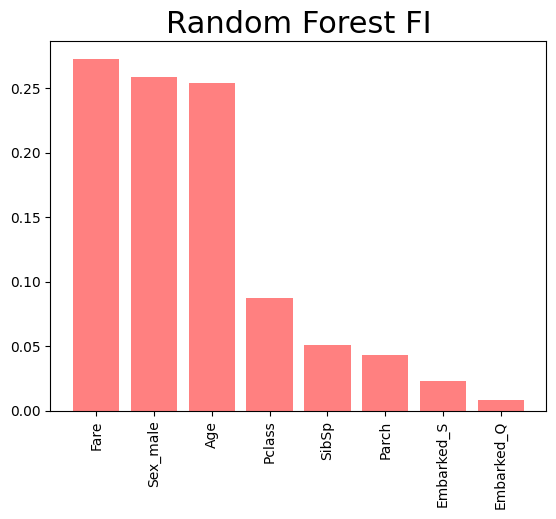

In [114]:
#Procedemos a la representación gráfica del DataFrame anterior usando la funcion "plt.bar()"
plt.bar(x = importancias_RF['Atributo'], height = importancias_RF['Importance'], color='#FF8080')

#Establecemos el titulo de la gráfica con su tamaño
plt.title('Random Forest FI', size = 22)

#Usamos la función "plt.xticks()" para evitar la superposición de letras en el eje x
plt.xticks(rotation = 'vertical')

#Mostramos la gráfica por pantalla
plt.show()

### ANÁLISIS DE LO OBTENIDO
Por último, para el caso de Random Forest, la variable con mas influencia sería también el sexo (_Sex Male_), indicando una vez más que los hombres tendrían una mayor probabilidad de sobrevivir.<br><br>
Por otro lado, una vez más también nos encontramos con que la ciudad donde los pasajeros embarcaron no tiene relevancia (variables _Embarked S_ y _Embarked C_).